# Capstone 1. Data Wrangling

## #Current 2021/2022 Tax Years: Residential Sales
Base Period Sales from July 1, 2018–June 30, 2020
In areas with few sales, the Assessor is allowed to use comparable sales going back up to five years.

https://bouldercounty.gov/property-and-land/assessor/sales/comps-2021/residential/

### Single Family Residential Properties <br>
Sales of single family homes, duplexes, and triplexes.
Market Area Maps for Single Family Properties
Comparable properties are often found in the same Market Area, which are groups of neighborhoods that have similar trends in the market. Boulder County uses these areas to establish market value for mass appraisal purposes.

## 1. Data Collection

 #### Load the packages

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


#### Data Loading 

In [3]:
gunbarrel = pd.read_excel('data/ar-comp-2021-residential-401-sheet.xlsx',sheet_name='2021 Market Area 401' )
superior = pd.read_excel('data/ar-comp-2021-residential-402-sheet.xlsx',sheet_name='2021 Market Area 402')
louisville = pd.read_excel('data/ar-comp-2021-residential-403-sheet.xlsx',sheet_name='2021 Market Area 403')
erie = pd.read_excel('data/ar-comp-2021-residential-404-sheet.xlsx',sheet_name='2021 Market Area 404')
lafayette = pd.read_excel('data/ar-comp-2021-residential-405-sheet.xlsx',sheet_name='2021 Market Area 405')

In [4]:
print(gunbarrel.shape, superior.shape, louisville.shape, erie.shape, lafayette.shape)


(706, 23) (817, 23) (1321, 23) (1847, 23) (2389, 23)


#### Data joining

In [5]:
df = pd.concat([gunbarrel, superior, louisville, erie, lafayette])
df.shape

(7080, 23)

## Data definition

In [6]:
df.columns

Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area'],
      dtype='object')

In [8]:
X = df.loc[:,['Property Type','Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF','Market Area','Time Adjust Sales Price']]


We remove fields 'Reception No', 'Sale Date (Mon-Yr)','Sale Price', 'Time Adjust Sales Price' to be used as a response variable. Need to figure out whether to use time adjusted or actual sale price. <br>

We also remove street address fields for now: <br>
       'Accout Number', 'Property Address Street Number',<br>
       'Property Address Street Dir', 'Property Address Street Name',<br>
       'Property Address Street Suffix', 'Property Address Unit Number', but keep the 'Property Type' in case we add condos/apartments. 

In [9]:
Y= df.loc[:,'Time Adjust Sales Price']

In [11]:
Y


0       581143.136625
1       652607.758723
2       553206.861188
3       495706.522160
4       576679.694605
            ...      
2384    773180.319485
2385    765964.675620
2386    757164.350655
2387    775666.458287
2388    729660.642766
Name: Time Adjust Sales Price, Length: 7080, dtype: float64

This is our current response variable, need to determine whether to use it or some actual sale price or anything else. The sales are float 64.

Let's look at X closely. 

In [12]:
X.head()

,Property Type,Location,Design,Quality,Eff Yr Built,Above Grd SF,Basemt Tot SF,Basemt Fin SF,Basemt Unf SF,Garage Type,Garage SF,Est Land SF,Market Area,Time Adjust Sales Price
0,SFR,UNINCORPORATED,Ranch,Avg ++,1990,1311,0,0,0,Attached,420,29780,401,581143.136625
1,SFR,UNINCORPORATED,Ranch,Avg ++,2001,1311,0,0,0,Attached,420,29780,401,652607.758723
2,SFR,UNINCORPORATED,Ranch,Avg,1980,1380,1050,1050,0,Attached,475,14234,401,553206.861188
3,SFR,UNINCORPORATED,Split level,Avg ++,2000,1270,500,500,0,Attached,475,8315,401,495706.522160
4,SFR,UNINCORPORATED,Split level,Avg,1995,850,500,500,0,Attached,475,10350,401,576679.694605


Let's expore if we have any missing data

In [13]:
missing = X.isnull().sum()
missing = missing[missing > 0]
print(missing.shape)
#missing.sort_values(inplace=True)
#missing.plot.bar()

(0,)


We don't have any missing data. Let's check the data types. 

In [14]:
X.dtypes

Property Type               object
Location                    object
Design                      object
Quality                     object
Eff Yr Built                 int64
Above Grd SF                 int64
Basemt Tot SF                int64
Basemt Fin SF                int64
Basemt Unf SF                int64
Garage Type                 object
Garage SF                   object
Est Land SF                  int64
Market Area                  int64
Time Adjust Sales Price    float64
dtype: object


#### 1. Change 'Garage SF' to an int

#### 2. We want to recode location, design, quality, garage type  as categorical variables things like 

In [17]:
X['Garage SF'] = X['Garage SF'].str.replace(r'\D+', '').astype(int)

/var/folders/93/rlhghy792jqb_shw4fl2xbn80000gn/T/ipykernel_86714/576785893.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X['Garage SF'] = X['Garage SF'].str.replace(r'\D+', '').astype(int)


In [18]:
X['Garage SF'] 

0       420
1       420
2       475
3       475
4       475
       ... 
2384    706
2385    706
2386    440
2387    600
2388    486
Name: Garage SF, Length: 7080, dtype: int64

In [16]:
#X['Garage SF'] = X['Garage SF'].astype(str).astype(int) 

ValueError: invalid literal for int() with base 10: '1,321'

In [19]:
X.dtypes

Property Type               object
Location                    object
Design                      object
Quality                     object
Eff Yr Built                 int64
Above Grd SF                 int64
Basemt Tot SF                int64
Basemt Fin SF                int64
Basemt Unf SF                int64
Garage Type                 object
Garage SF                    int64
Est Land SF                  int64
Market Area                  int64
Time Adjust Sales Price    float64
dtype: object

So we confirmed that 'Garage SF' is now numeric. Let's check unique values for Location, Design, Quality, Garage Type

In [20]:
X['Location'].unique()

array(['UNINCORPORATED', 'BOULDER', 'SUPERIOR', 'LOUISVILLE', 'ERIE',
       'LAFAYETTE'], dtype=object)

The only new information we're learning beyond market are is whether the location is unincorporated or not. So we can drop the whole variable and only have a binary variable for Unincorporated =1, otherwise 0. 

In [21]:
X['Unincorporated']= 0
X.loc[X['Location']=='UNINCORPORATED', 'Unincorporated']=1
X['Unincorporated'].sum()

577

In [22]:
X['Design'].unique()

array(['Ranch', 'Split level', 'Bi Level', 'Multi Sty', 'Paired',
       '1 Sty Townh', 'Modular'], dtype=object)

So for Design there is no natural progression, so we prefer to one hot encode the variables and perhaps drop one category. 

In [23]:
# Convert the Country column to a one hot encoded Data Frame
X = pd.get_dummies(X, columns=['Design'], prefix='Design')

In [24]:
X['Design_Ranch'].sum()

1646

In [26]:
X.head()

,Property Type,Location,Quality,Eff Yr Built,Above Grd SF,Basemt Tot SF,Basemt Fin SF,Basemt Unf SF,Garage Type,Garage SF,...,Market Area,Time Adjust Sales Price,Unincorporated,Design_1 Sty Townh,Design_Bi Level,Design_Modular,Design_Multi Sty,Design_Paired,Design_Ranch,Design_Split level
0,SFR,UNINCORPORATED,Avg ++,1990,1311,0,0,0,Attached,420,...,401,581143.136625,1,0,0,0,0,0,1,0
1,SFR,UNINCORPORATED,Avg ++,2001,1311,0,0,0,Attached,420,...,401,652607.758723,1,0,0,0,0,0,1,0
2,SFR,UNINCORPORATED,Avg,1980,1380,1050,1050,0,Attached,475,...,401,553206.861188,1,0,0,0,0,0,1,0
3,SFR,UNINCORPORATED,Avg ++,2000,1270,500,500,0,Attached,475,...,401,495706.522160,1,0,0,0,0,0,0,1
4,SFR,UNINCORPORATED,Avg,1995,850,500,500,0,Attached,475,...,401,576679.694605,1,0,0,0,0,0,0,1


So for quality there is a natural progression. It seems that the assumption of equal distance between the quality levels is correct as well. So we recode it as a single variable

In [27]:
X['Quality'].unique()

array(['Avg ++', 'Avg', 'Avg +', 'Good ++', 'Good', 'V Good', 'Good +',
       'V Good +', 'V Good++', 'Excel', 'Excel+', 'Fair', 'Excel++'],
      dtype=object)

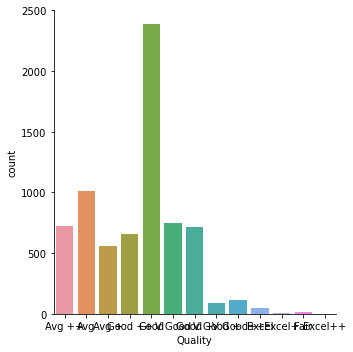

In [28]:
sns.catplot(x='Quality', data=X, kind='count')
plt.show()

In [29]:
# Create the Quality_cat column filled with zeros
X['Quality_cat'] = 0

X.loc[X['Quality']=='Avg', 'Quality_cat'] = 1
X.loc[X['Quality']=='Avg +', 'Quality_cat'] = 2
X.loc[X['Quality']=='Avg ++', 'Quality_cat'] = 3
X.loc[X['Quality']=='Good', 'Quality_cat'] = 4
X.loc[X['Quality']=='Good +', 'Quality_cat'] = 5
X.loc[X['Quality']=='Good ++', 'Quality_cat'] = 6
X.loc[X['Quality']=='V Good', 'Quality_cat'] = 7
X.loc[X['Quality']=='V Good +', 'Quality_cat'] = 8
X.loc[X['Quality']=='V Good++', 'Quality_cat'] = 9
X.loc[X['Quality']=='Excel', 'Quality_cat'] = 10
X.loc[X['Quality']=='Excel+', 'Quality_cat'] = 11
X.loc[X['Quality']=='Excel++', 'Quality_cat'] = 12

In [30]:
X['Quality_cat']

0       3
1       3
2       1
3       3
4       1
       ..
2384    6
2385    6
2386    4
2387    5
2388    4
Name: Quality_cat, Length: 7080, dtype: int64

In [31]:
X['Garage Type'].unique()

array(['Attached', 'Carport', 'Detached', 'None', 'Multiple', 'Basement',
       'Workshop'], dtype=object)

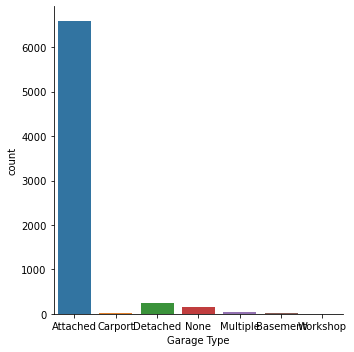

In [32]:
sns.catplot(x='Garage Type', data=X, kind='count')
plt.show()

For garage we will binarize to attached and other

In [33]:
X['Garage Attached'] = 0
X.loc[X['Garage Type']=='Attached', 'Garage Attached'] = 1
X['Garage Attached'].sum()

6590

Encode market area as numbers 1-5. 

In [34]:
X['Market Area']=X['Market Area']-400

In [35]:
X['Market Area']

0       1
1       1
2       1
3       1
4       1
       ..
2384    5
2385    5
2386    5
2387    5
2388    5
Name: Market Area, Length: 7080, dtype: int64

In [36]:
X.dtypes

Property Type               object
Location                    object
Quality                     object
Eff Yr Built                 int64
Above Grd SF                 int64
Basemt Tot SF                int64
Basemt Fin SF                int64
Basemt Unf SF                int64
Garage Type                 object
Garage SF                    int64
Est Land SF                  int64
Market Area                  int64
Time Adjust Sales Price    float64
Unincorporated               int64
Design_1 Sty Townh           uint8
Design_Bi Level              uint8
Design_Modular               uint8
Design_Multi Sty             uint8
Design_Paired                uint8
Design_Ranch                 uint8
Design_Split level           uint8
Quality_cat                  int64
Garage Attached              int64
dtype: object

In [38]:
X.drop(['Property Type','Location','Quality', 'Garage Type'], axis=1)

,Eff Yr Built,Above Grd SF,Basemt Tot SF,Basemt Fin SF,Basemt Unf SF,Garage SF,Est Land SF,Market Area,Time Adjust Sales Price,Unincorporated,Design_1 Sty Townh,Design_Bi Level,Design_Modular,Design_Multi Sty,Design_Paired,Design_Ranch,Design_Split level,Quality_cat,Garage Attached
0,1990,1311,0,0,0,420,29780,1,581143.136625,1,0,0,0,0,0,1,0,3,1
1,2001,1311,0,0,0,420,29780,1,652607.758723,1,0,0,0,0,0,1,0,3,1
2,1980,1380,1050,1050,0,475,14234,1,553206.861188,1,0,0,0,0,0,1,0,1,1
3,2000,1270,500,500,0,475,8315,1,495706.522160,1,0,0,0,0,0,0,1,3,1
4,1995,850,500,500,0,475,10350,1,576679.694605,1,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2005,2170,1030,0,1030,706,14842,5,773180.319485,0,0,0,0,1,0,0,0,6,1
2385,2005,2170,1030,0,1030,706,14842,5,765964.675620,0,0,0,0,1,0,0,0,6,1
2386,2005,2188,1072,965,107,440,12110,5,757164.350655,0,0,0,0,1,0,0,0,4,1
2387,2004,2450,1254,0,1254,600,13294,5,775666.458287,0,0,0,0,1,0,0,0,5,1


In [39]:
X.dtypes

Property Type               object
Location                    object
Quality                     object
Eff Yr Built                 int64
Above Grd SF                 int64
Basemt Tot SF                int64
Basemt Fin SF                int64
Basemt Unf SF                int64
Garage Type                 object
Garage SF                    int64
Est Land SF                  int64
Market Area                  int64
Time Adjust Sales Price    float64
Unincorporated               int64
Design_1 Sty Townh           uint8
Design_Bi Level              uint8
Design_Modular               uint8
Design_Multi Sty             uint8
Design_Paired                uint8
Design_Ranch                 uint8
Design_Split level           uint8
Quality_cat                  int64
Garage Attached              int64
dtype: object

In [42]:
X.to_csv('data/clean_data.csv', index=False)